# ML Examples: Iris Dataset

| **Title**         | ML Examples |
| --- | --- |
| **Author**        | Alexander Kapitanov                            |
| **Contact**       | sallador@bk.ru                                 |
| **Project lang**  | Python                                         |
| **Packages**      | numpy, scipy, sklearn, seaborn, matplotlib     |
| **License**       | GNU GPL 3.0                                    |


## Ирисы Фишера

Ирисы Фишера - исследуемый набор данных для задачи многоклассовой *классификации* (в частности, задачи кластеризации). Выборка (датасет) содержит 150 экземпляров ириса, по 50 для **трех** видов (`target`):

- Ирис щетинистый (Iris setosa), 
- Ирис виргинский (Iris virginica),
- Ирис разноцветный (Iris versicolor).

В задаче классификации имеется **четыре** признака (`features`) или характеристики, выраженные в виде целого числа в сантиметрах:

- `sepal length` - длина наружной доли околоцветника;
- `sepal width` - ширина наружной доли околоцветника;
- `petal length` - длина внутренней доли околоцветника;
- `petal width` - ширина внутренней доли околоцветника.

С помощью матрицы объекты-признаки, где объектом является отдельно взятый экземпляр цветка, а признак - физические размеры, требуется определить правило классификации, которое разделяет растения по видам.

Отличительная особенность: класс *Iris setosa* линейно разделим относительно двух других классов.


### Список зависимостей:

`requerements.txt`
```
numpy
scipy
pandas
seaborn
sklearn
matplotlib
```

## Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('seaborn: {}'.format(sns.__version__))

import matplotlib.pyplot as plt
%matplotlib inline

numpy: 1.17.0
pandas: 0.25.3
seaborn: 0.9.0


## Загрузка датасета

Для `sklearn` характерно единообразие атрибутов для большинства наборов данных: они содержат краткое описание датасета `DESCR`, сами данные (объекты и признаки) `data`, метки (вектор правильных ответов) `target`, их название `target_names`, а также название признаков, по которым проводится классификация `feature_names`.

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Описание

In [5]:
print(iris['DESCR'][:1100])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Метки и признаки

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Матрица объекты-признаки

Матрица объекты-признаки имеет размеры 150х4, где 150 - количество объектов классификации, 4 - количество признаков, по которым проводится классификация.

In [10]:
iris['data'].shape, iris['target'].shape

((150, 4), (150,))

In [11]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['labels'] = iris['target_names'][iris['target']] # iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Краткая статистика датасета

Метод `describe` позволяет посмотреть математическую статистику набора данных: количество непустых значений, среднее, разброс (среднеквадратичное отклонение), минимальное и максимальное значения, а также квантили (перцентили).

In [12]:
iris_df.describe().iloc[[0, 1, 2, 3, 7], :].round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
max,7.90,4.40,6.90,2.50


### Визуальный анализ

Для каждого признака построим гистограммы распределений и для каждой пары признаков посмотрим на двумерные отображения на плоскость. Как видно, *Iris setosa* линейно разделим относительно двух других классов. Это отчетливо видно по гистограммам признаков *petal length* и *petal width*.

Также следует отметить, что распределения отдаленно похожи на нормальные, с различными параметрами математического ожидания и дисперсии. Выбросов в выборках нет. Кроме того, по признакам *petal length* и *petal width* прослеживается сильная зависимость: **коэффициент корреляции** Пирсона близок к единице - точки на плоскости расположены вдоль одной линии. 

По парам *sepal width* и *sepal length* **очень слабая корреляция** (-0.12), по двум парам *sepal width* и *petal width / petal length* корреляция слабая (-0.37 и -0.43 соответственно). При этом коэффициент корреляции отрицательный (то есть с ростом значения одного признака уменьшается значение другого).

По другим парам признаков точки расположены "тучнее" в виде сгустков областей и несут _меньше_ полезной информации с точки зрения многоклассовой классификации. Если бы в этой задаче стоял вопрос разделения цветков только по двум признакам *sepal length* и *sepal width*, то качество классификации было бы существенно хуже, т.к. получить точное разделение по областям - невозможно, либо модель будет **переобучена** и на новых данных даст ложные результаты. 

In [13]:
iris_df.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


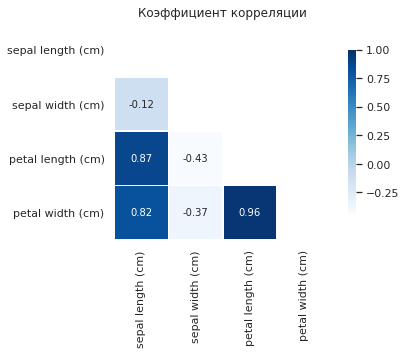

In [14]:
# Prepare mask for upper diag
df_corr = iris_df.corr()
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
with sns.axes_style('white'):
    fig, ax = plt.subplots()
    sns.heatmap(
        data=df_corr, 
        mask=mask, 
        cmap='Blues', 
        square=True, 
        annot=True, 
        linewidths=0.75, 
        cbar_kws={"shrink": 0.75}
    )
    ax.set_title("Коэффициент корреляции")


Text(0.5, 1.01, 'Гистограммы распределений')

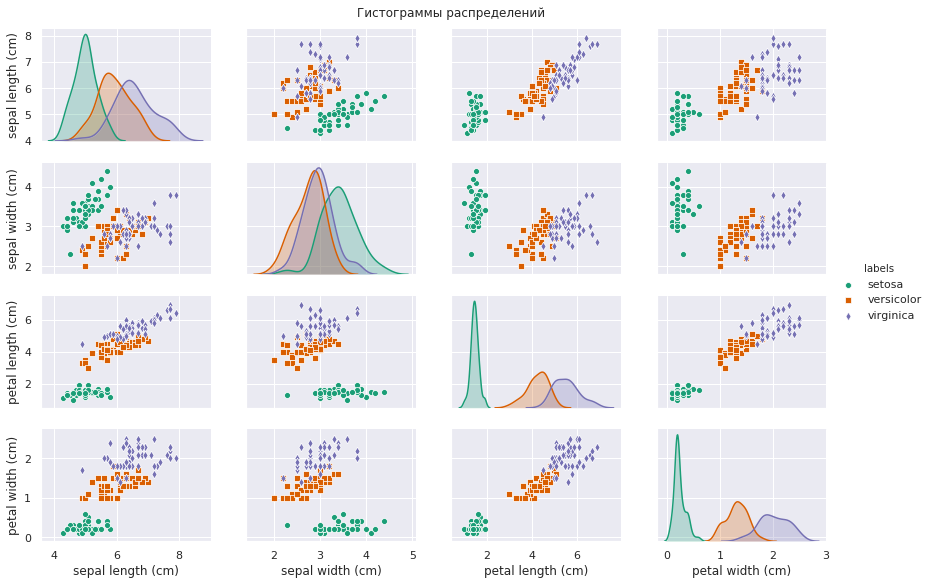

In [15]:
f = sns.pairplot(
    data=iris_df, 
    diag_kind='kde',
    hue='labels', 
    markers=['o', 's', 'd'],
    palette='Dark2',
    height=2.0, 
    aspect=1.5
)
f.fig.suptitle("Гистограммы распределений", y=1.01)

# def hide_current_axis(*args, **kwds):
#     plt.gca().set_visible(False)

# f.map_upper(hide_current_axis)

### Визуализация без меток

Представим, что информация о метках недоступна. То есть информация о количестве классов и их распределении по признакам недоступна: неизвестно сколько различных цветков у нас (число классов), а также неизвестно, как эти классы могли быть распределены. Иными словами, задача **классификации** превращается в задачу **кластеризации** (позже мы ещё вернемся к этому). Посмотрим, как выглядят распределения и отображения на плоскость по парам признаков в этом случае.

Text(0.5, 1.01, 'Гистограммы без меток')

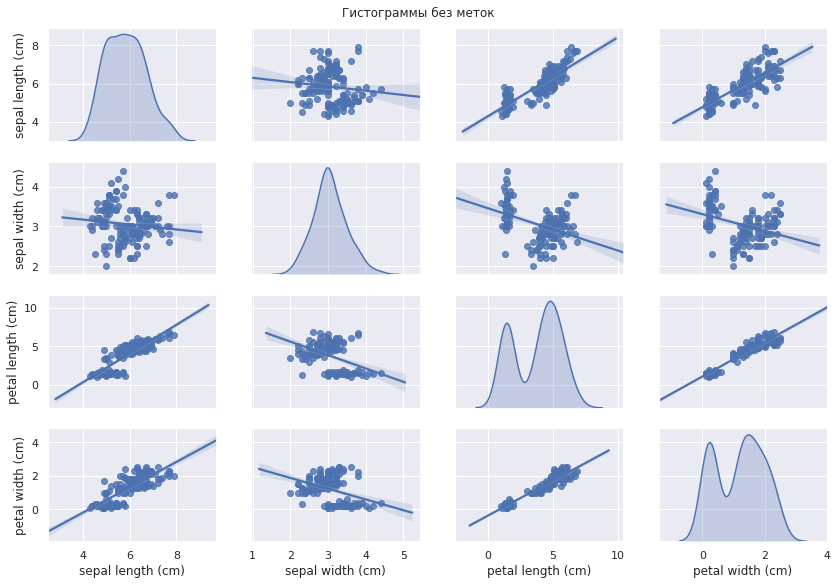

In [16]:
f = sns.pairplot(
    data=iris_df.drop(['labels'], axis=1), 
    diag_kind='kde',
    kind='reg',
    palette='Dark2',
    height=2.0, 
    aspect=1.5
)
f.fig.suptitle("Гистограммы без меток", y=1.01)

Как видно из распределений без меток (вектора ответов) мы имеем как минимум два класса. Также видна сильная корреляция по признакам *petal length* и *petal width*. В то же время, из пары признаков *sepal length* и *sepal width* можно извлечь немного информации, т.к. данные сгруппированы в трудно разделимой области.

### Визуализация по паре `sepal`

In [17]:
iris_df[['sepal length (cm)', 'sepal width (cm)']].corr(method='pearson')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


#### Кластеризация (без меток)

Text(0.5, 1.02, 'Пара признаков sepal')

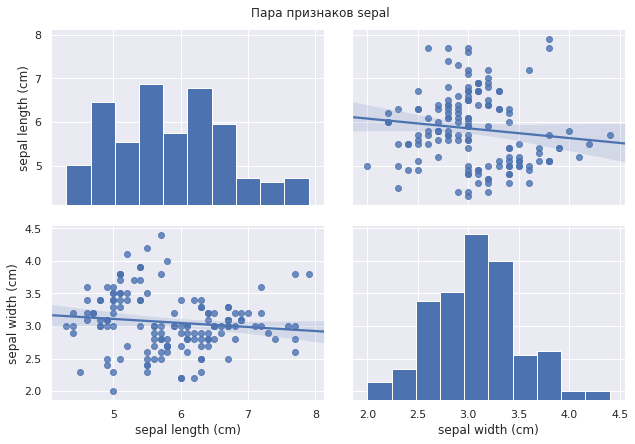

In [18]:
f = sns.pairplot(
    data=iris_df[['sepal length (cm)', 'sepal width (cm)']], 
    diag_kind='hist',
    kind="reg",
    palette='Dark2',
    height=3.0, 
    aspect=1.5
)
f.fig.suptitle("Пара признаков sepal", y=1.02)

#### Классификация (с метками)

Text(0.5, 1.02, 'Пара признаков sepal')

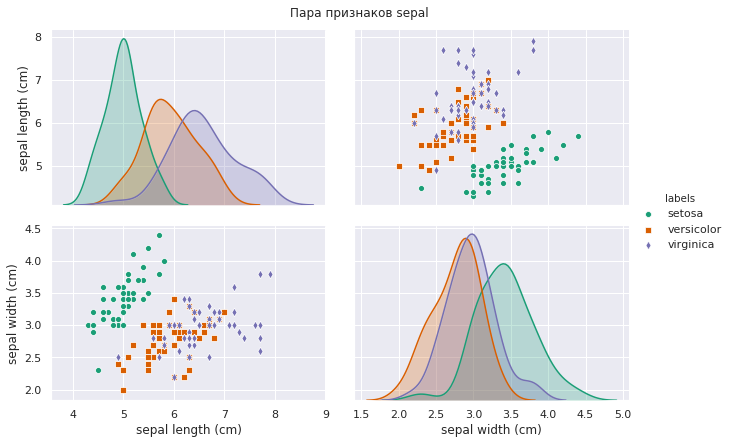

In [19]:
f = sns.pairplot(
    data=iris_df, 
    vars=iris_df.columns.values[:2],
    diag_kind='kde',
    hue='labels', 
    markers=['o', 's', 'd'],
    palette='Dark2',
    height=3.0, 
    aspect=1.5
)
f.fig.suptitle("Пара признаков sepal", y=1.02)

### Визуализация по паре `petal`

In [20]:
iris_df[['petal length (cm)', 'petal width (cm)']].corr(method='pearson')

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.962865
petal width (cm),0.962865,1.000000


#### Кластеризация (без меток)

Text(0.5, 1.02, 'Пара признаков petal')

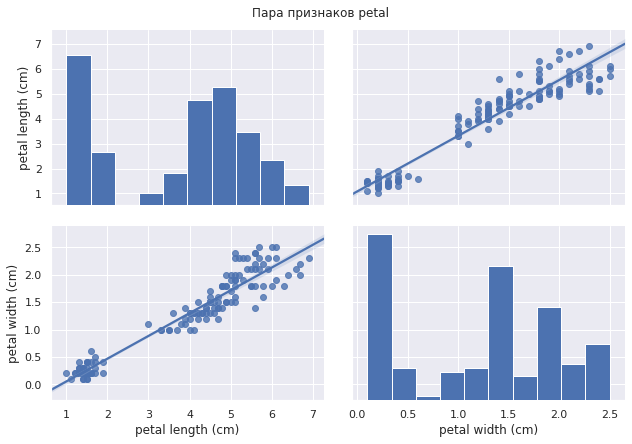

In [21]:
f = sns.pairplot(
    data=iris_df[['petal length (cm)', 'petal width (cm)']], 
    diag_kind='hist',
    kind="reg",
    palette='Dark2',
    height=3.0, 
    aspect=1.5
)
f.fig.suptitle("Пара признаков petal", y=1.02)

#### Классификация (с метками)

Text(0.5, 1.02, 'Пара признаков petal')

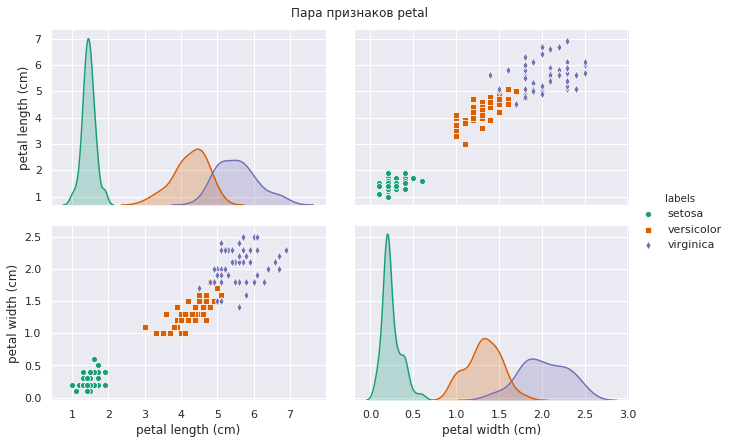

In [22]:
f = sns.pairplot(
    data=iris_df, 
    vars=iris_df.columns.values[2:4],
    diag_kind='kde',
    hue='labels', 
    markers=['o', 's', 'd'],
    palette='Dark2',
    height=3.0, 
    aspect=1.5
)
f.fig.suptitle("Пара признаков petal", y=1.02)

In [23]:
X, y = iris['data'], iris['target']

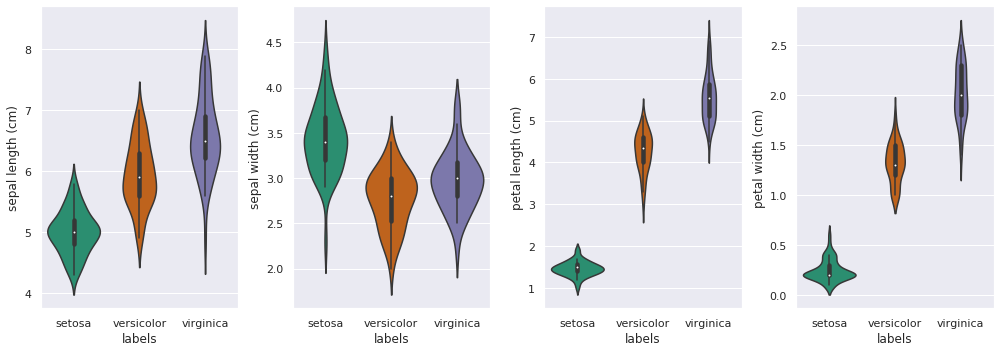

In [24]:
plt.figure(num='Iris Dataset: violin plots', figsize=(14, 5))
for i in range(4):
    plt.subplot(1, 4, 1+i)
    sns.violinplot(
        x='labels', 
        y=iris_df.columns[i], 
        data=iris_df,
        palette='Dark2'
    )
plt.tight_layout()

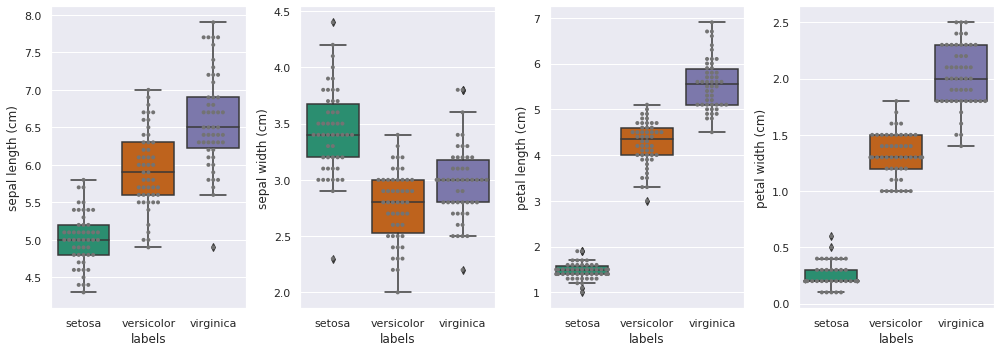

In [25]:
plt.figure(num='Iris Dataset: violin plots', figsize=(14, 5))
for i in range(4):
    plt.subplot(1, 4, 1+i)
    ax = sns.boxplot(
        x='labels', 
        y=iris_df.columns[i], 
        data=iris_df,
        palette='Dark2'
    )
    ax = sns.swarmplot(
        x='labels', 
        y=iris_df.columns[i], 
        data=iris_df,
        color='0.45',
        size=4,
        # palette='Dark2'
    )
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

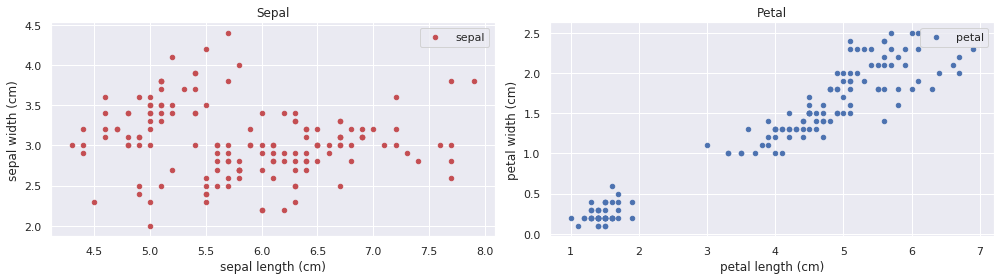

In [26]:
plt.figure(num='Iris Dataset: Sepal & Petal')
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
iris_df.plot(x=iris_df.columns[0],
             y=iris_df.columns[1],
             kind="scatter",
             ax=ax[0],
             sharex=False,
             sharey=False,
             label="sepal",
             color='r'
            )
iris_df.plot(x=iris_df.columns[2],
             y=iris_df.columns[3],
             kind="scatter",
             ax=ax[1],
             sharex=False,
             sharey=False,
             label="petal",
             color='b'
            )
ax[0].set(title='Sepal')
ax[1].set(title='Petal')
ax[0].legend()
ax[1].legend()
plt.tight_layout()